 # 9. Partial Derivatives

In [1164]:
from spb import (
    plot,
    plot3d,
    plot_contour,
    plot3d_parametric_line,
    plot_vector
)
from spb.defaults import cfg
from sympy import (
    cos,
    Eq,
    Function,
    Lambda,
    Limit,
    Matrix,
    pi,
    sin,
    Symbol,
    symbols
)

cfg['matplotlib']['show_minor_grid'] = True

In [1165]:
x = symbols('x')
g = Function('g')
h = Function('h')

y = h(x)
z = g(y)

Eq(z, g(h(x)))

True

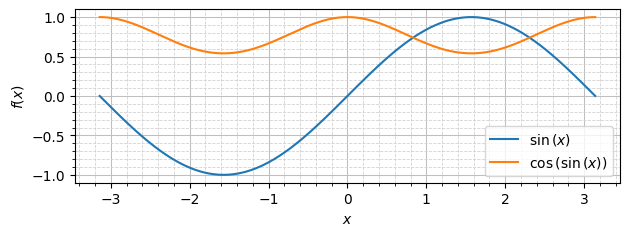

In [1166]:
plot(
    h(x).subs(h, sin),
    g(y).subs(y, sin(x)).subs(g, cos),
    (x, -pi, pi),
    aspect='equal'
)

In [1167]:
eq1 = Eq(z.diff(x), g(y).diff(y) * h(x).diff(x))
eq1

True

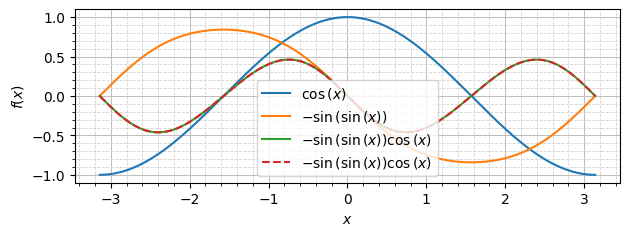

In [1168]:
h_der = h(x).diff(x).subs(h, sin).doit()
g_der = g(y).diff(y).subs(y, sin(x)).subs(g, cos).doit()
z_der = z.diff(x).subs({g: cos, h: sin}).doit()

plot(
    h_der,
    g_der,
    h_der * g_der,
    z_der,
    (x, -pi, pi),
    aspect='equal',
    rendering_kw=[{}, {}, {}, {'linestyle': '--'}]
)

In [1169]:
x1, y1, z1 = symbols('x1, y1, z1')

delta_x = x - x1
delta_y = y - y1
delta_z = z - z1

delta_z_x = delta_z / delta_x
delta_z_y = delta_z / delta_y
delta_y_x = delta_y / delta_x

Eq(
    delta_z_x,
    delta_z_y * delta_y_x
)

True

In [1170]:
x, y = symbols('x, y')
f = Function('f')
z = f(x, y)
z

f(x, y)

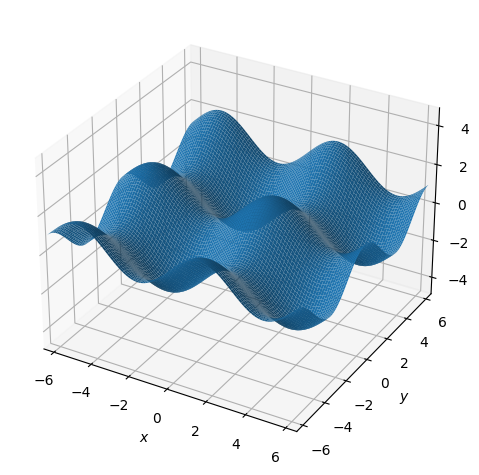

In [1171]:
trigo_fun = Lambda((x, y), sin(x) + cos(y))

p1 = plot3d(
    z.subs(f(x, y), trigo_fun),
    (x, -2*pi, 2*pi),
    (y, -2*pi, 2*pi),
    show=False,
    aspect='equal'
)

p1.show()

In [1172]:
h = Symbol('h')
lim1 = Limit((f(x + h, y) - f(x, y)) / h, h, 0)
lim1

Limit((-f(x, y) + f(h + x, y))/h, h, 0, dir='+')

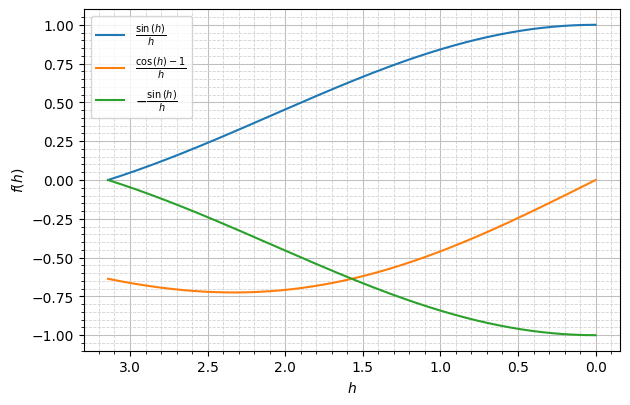

In [1173]:
plot(
    lim1.subs({f: trigo_fun, x: 0, y: 0}).args[0],
    lim1.subs({f: trigo_fun, x: pi/2, y: 0}).args[0],
    lim1.subs({f: trigo_fun, x: pi, y: 0}).args[0],
    (h, pi, 1.e-10),
    aspect='equal'
)

In [1174]:
Eq(z.diff(x), lim1)

Eq(Derivative(f(x, y), x), Limit((-f(x, y) + f(h + x, y))/h, h, 0, dir='+'))

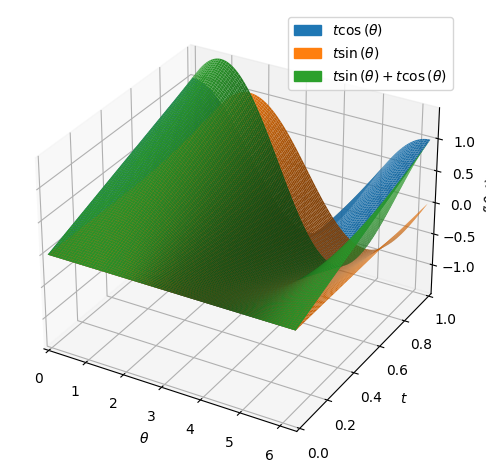

In [1175]:
t, theta = symbols('t, θ')

x_t = x + cos(theta) * t
y_t = y + sin(theta) * t

plot3d(
    x_t.subs(x, 0),
    y_t.subs(y, 0),
    x_t.subs(x, 0) + y_t.subs(y, 0),
    (theta, 0, 2*pi),
    (t, 0, 1)
)

In [1176]:
directional_derivative = z.diff(x)*cos(theta) + z.diff(y)*sin(theta)
directional_derivative

sin(θ)*Derivative(f(x, y), y) + cos(θ)*Derivative(f(x, y), x)

In [1177]:
dd_subs = {x: 0, y: 0, theta: 0}

Eq(
    (x_t + y_t).diff(t).subs(dd_subs),
    directional_derivative.subs(z, (x_t + y_t)).subs(dd_subs).doit()
)

True

In [1178]:
g = Function('g')
h = Function('h')

x = g(t)
y = h(t)

z = f(x, y)
z

f(g(t), h(t))

In [1179]:
Eq(
    z.diff(t),
    z.diff(x) * x.diff(t) + z.diff(y) * y.diff(t)
)

True

In [1180]:
total_differential = (z.diff(x) * x.diff(t) + z.diff(y) * y.diff(t)) * t
total_differential

t*(Derivative(f(g(t), h(t)), g(t))*Derivative(g(t), t) + Derivative(f(g(t), h(t)), h(t))*Derivative(h(t), t))

In [1181]:
Eq(
    z.diff(t) * t,
    total_differential
)

True

In [1182]:
x, y = symbols('x, y')
x0, y0 = symbols('x0, y0')

z0 = f(x0, y0)

Eq(
    (z - z0),
    z0.diff(x0) * (x - x0) + z0.diff(y0) * (y - y0)
)

Eq(-f(x0, y0) + f(g(t), h(t)), (x - x0)*Derivative(f(x0, y0), x0) + (y - y0)*Derivative(f(x0, y0), y0))

In [1183]:
x = g(t)
y = h(t)

gradient = Matrix([z.diff(x), z.diff(y)])
gradient

Matrix([
[Derivative(f(g(t), h(t)), g(t))],
[Derivative(f(g(t), h(t)), h(t))]])

In [1184]:
parameterized_curve = Matrix([x.diff(t), y.diff(t)])
parameterized_curve

Matrix([
[Derivative(g(t), t)],
[Derivative(h(t), t)]])

In [1185]:
Eq(
    z.diff(t),
    gradient.dot(parameterized_curve)
)

True

In [1186]:
x, y = symbols('x, y')

subs_grad = {f(g(t), h(t)): trigo_fun.args[1]}
gra1 = gradient.subs(subs_grad).replace(g(t), x).replace(h(t), y).doit()
gra1

Matrix([
[ cos(x)],
[-sin(y)]])

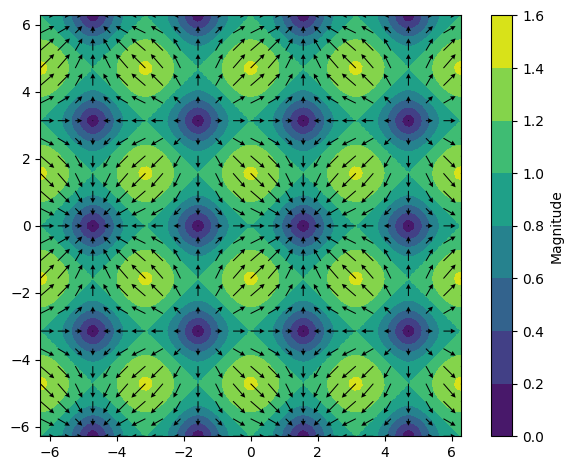

In [1187]:
plot_vector(
    gra1,
    (x, -2*pi, 2*pi),
    (y, -2*pi, 2*pi),
    quiver_kw=dict(color='black', scale=30, headwidth=5),
    aspect='equal',
    grid=False
)

In [1188]:
t1, t2 = symbols('t1, t2')

subs_pc = {
    g(t): sin(t1),
    h(t): cos(t2)
}

pc1 = parameterized_curve.subs(subs_pc)
pc1 = Matrix([pc1[0].replace(t, t1), pc1[1].replace(t, t2)])
pc1

Matrix([
[Derivative(sin(t1), t1)],
[Derivative(cos(t2), t2)]])

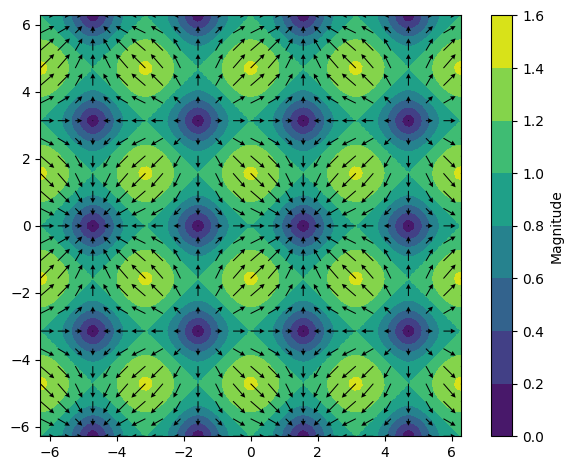

In [1189]:
plot_vector(
    pc1.doit(),
    (t1, -2*pi, 2*pi),
    (t2, -2*pi, 2*pi),
    quiver_kw=dict(color='black', scale=30, headwidth=5),
    aspect='equal',
    grid=False
)

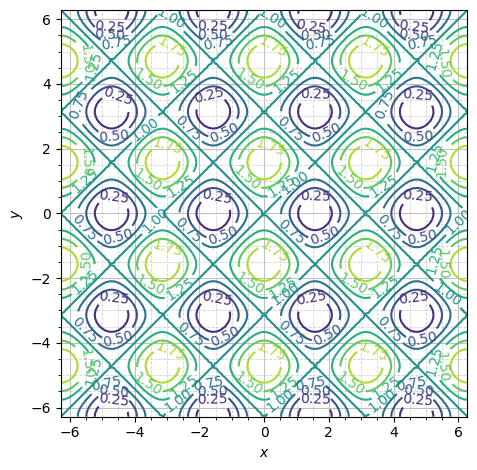

In [1190]:
plot_contour(
    gra1.dot(pc1.replace(t1, x).replace(t2, y)).doit(),
    (x, -2*pi, 2*pi),
    (y, -2*pi, 2*pi),
    aspect='equal',
    is_filled=False
)

In [1250]:
pl_z

t*(sin(t)**2 + cos(t)**2)

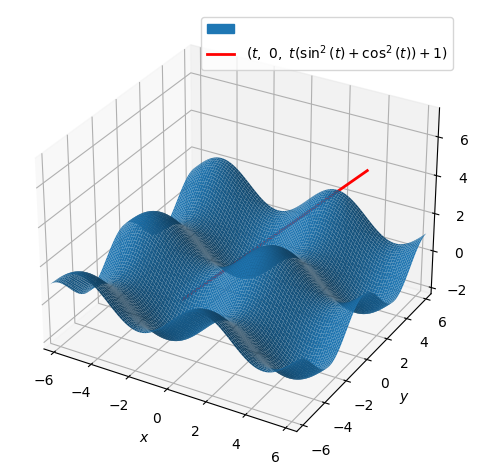

In [1253]:
u, v = symbols('u, v')
t0 = 0

px = 0
py = 0
pz = trigo_fun.args[1].subs({x: px, y: py})

pl_x = sin(t).diff(t).subs(t, t0)*(t-t0)
pl_y = cos(t).diff(t).subs(t, t0)*(t-t0)
pl_z = gra1.dot(pc1).subs({x: t, y: t}).replace(t1, t).replace(t2, t).doit()*(t-t0)

p2 = plot3d_parametric_line(
    pl_x + px,
    pl_y + py,
    pl_z + pz,
    (t, -pi, 2*pi),
    show=False,
    aspect='equal',
    rendering_kw={'color': 'r', 'lw': 2},
    use_cm=False
)

(p1 + p2).show()